# Dataset Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Callable

RAW_ARGS = ("labels/raw", r"\s+", None)
PROCESSED_ARGS = ("labels/processed", r",", 0)

ALL_LABELS = "all.txt"
TRAIN_LABELS = "train.txt"
TEST_LABELS = "test.txt"

def create_df_loader(base_dir: str, delimiter: str, header: int | None) -> Callable[[str], pd.DataFrame]:
    def load_df(file_path: str):
        if header is None: names = ["name", "score"]
        else: names = None
        df = pd.read_csv(f"{base_dir}/{file_path}", delimiter=delimiter, header=header, names=names)
        return df
    return load_df

load_df = create_df_loader(*PROCESSED_ARGS)

In [45]:
print("--- Dataset Overview ---")

df = load_df(ALL_LABELS)
df.head()

--- Dataset Overview ---


,name,score
0,CF437.jpg,0.470833
1,AM1384.jpg,0.366667
2,AM1234.jpg,0.287500
3,AM1774.jpg,0.687500
4,CF215.jpg,0.508333


In [46]:
print("--- Data Integrity Checks ---")
print(f"Missing values in name column: {df['name'].isnull().sum()}")
print(f"Missing values in score column: {df['score'].isnull().sum()}")
print(f"Duplicate names: {df['name'].duplicated().sum()}") # Critical check!

--- Data Integrity Checks ---
Missing values in name column: 0
Missing values in score column: 0
Duplicate names: 0


In [47]:
min_score = df["score"].min()
max_score = df["score"].max()

print(f"Score range: {min_score} - {max_score}")

Score range: 0.0041667499999999 - 0.9375



--- Detailed Analysis of Attractiveness Scores ---
count    5500.000000
mean        0.497723
std         0.172028
min         0.004167
25%         0.375000
50%         0.458333
75%         0.633333
max         0.937500
Name: score, dtype: float64

Additional Percentiles:
 10th %ile: 0.300
 25th %ile: 0.375
 50th %ile: 0.458
 75th %ile: 0.633
 90th %ile: 0.758
 95th %ile: 0.804
 99th %ile: 0.867


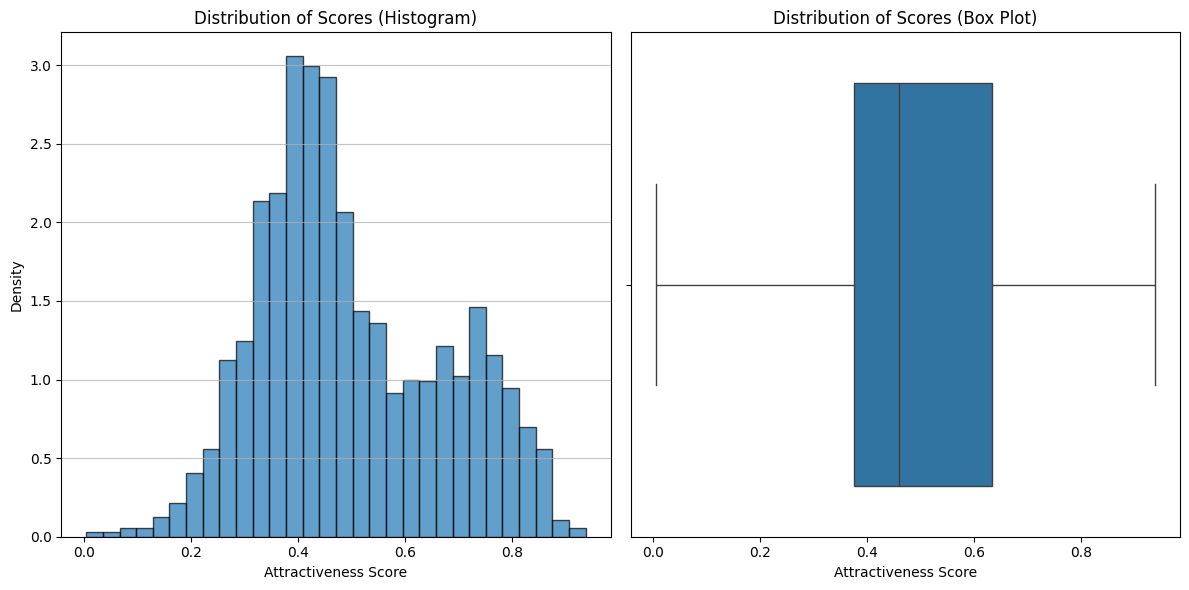

In [48]:
print("\n--- Detailed Analysis of Attractiveness Scores ---")
# Get basic statistics
print(df['score'].describe())

# Calculate and print additional useful percentiles
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
print("\nAdditional Percentiles:")
for p in percentiles:
    value = df['score'].quantile(p)
    print(f" {p*100:.0f}th %ile: {value:.3f}")

# Plot a detailed histogram with a Kernel Density Estimate (KDE)
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1) # 1 row, 2 cols, plot 1
n, bins, patches = plt.hist(df['score'], bins=30, edgecolor='black', alpha=0.7, density=True)
plt.title('Distribution of Scores (Histogram)')
plt.xlabel('Attractiveness Score')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Box plot to show median, quartiles, and outliers
plt.subplot(1, 2, 2) # 1 row, 2 cols, plot 2
sns.boxplot(x=df['score'])
plt.title('Distribution of Scores (Box Plot)')
plt.xlabel('Attractiveness Score')

plt.tight_layout() # Prevents label overlapping
plt.show()



--- Comparing Train and Test Distributions ---
Train set size: 3300
Test set size: 2200

Train Set Scores - Describe:
count    3300.000000
mean        0.497198
std         0.173632
min         0.008333
25%         0.375000
50%         0.458333
75%         0.633333
max         0.925000
Name: score, dtype: float64

Test Set Scores - Describe:
count    2200.000000
mean        0.498509
std         0.169630
min         0.004167
25%         0.375000
50%         0.462500
75%         0.629167
max         0.937500
Name: score, dtype: float64


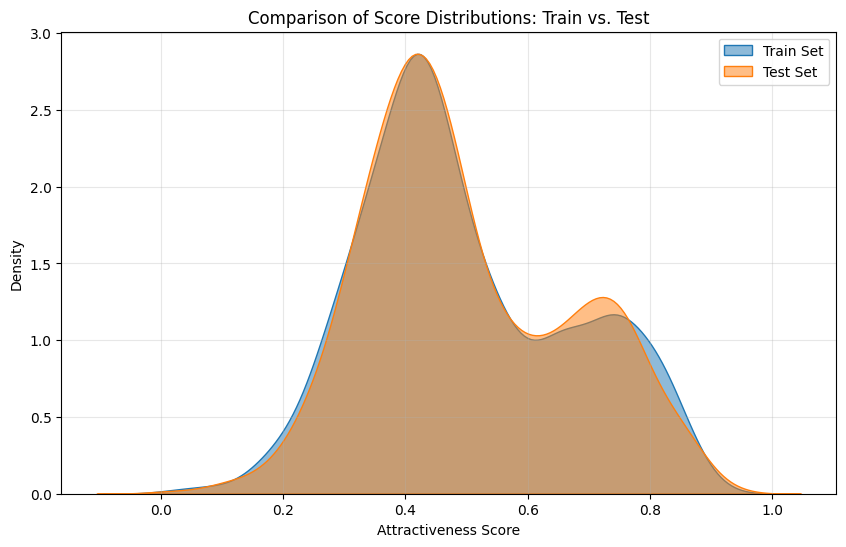

In [49]:
print("\n--- Comparing Train and Test Distributions ---")

train_df = load_df('train.txt')
test_df = load_df('test.txt')

print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Compare the statistics
print("\nTrain Set Scores - Describe:")
print(train_df['score'].describe())
print("\nTest Set Scores - Describe:")
print(test_df['score'].describe())

# Plot the distributions together for a visual comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['score'], label='Train Set', fill=True, alpha=0.5)
sns.kdeplot(test_df['score'], label='Test Set', fill=True, alpha=0.5)
plt.title('Comparison of Score Distributions: Train vs. Test')
plt.xlabel('Attractiveness Score')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()